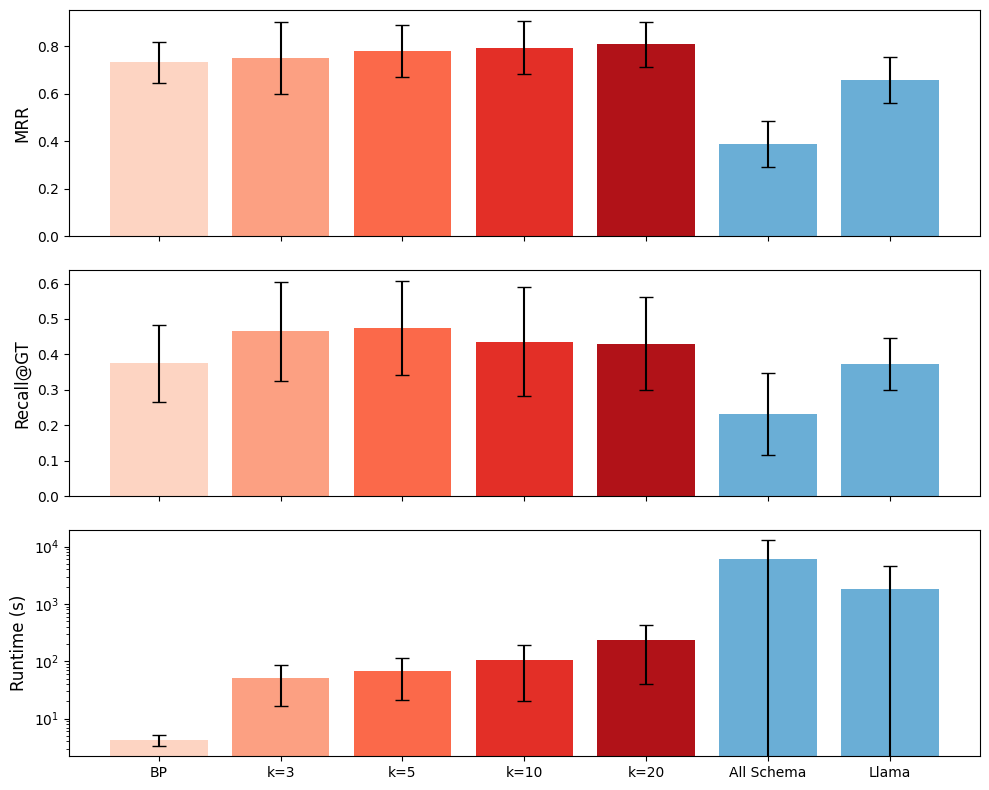

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('gdc_studies-ablations.csv')

# Filter and prepare data
methods_order = ['BP', 'k=3', 'k=5', 'k=10', 'k=20', 'All Schema', 'Llama']
df['method'] = df['method'].replace('GPT4o', 'All Schema')
df['method'] = df['method'].replace('Llama3.3', 'Llama')
df = df[df['method'].isin(methods_order)]

# Calculate mean and std for each metric
agg_df = df.groupby('method').agg({
    'mrr': ['mean', 'std'],
    'All_RecallAtSizeofGroundTruth': ['mean', 'std'],
    'runtime': ['mean', 'std']
}).reindex(methods_order)

# Create color palettes
reds = sns.color_palette("Reds", n_colors=5)
blues = sns.color_palette("Blues", n_colors=1)
colors = reds + [blues[0]] * 2  # 5 reds + 2 blues

# Create figure
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot MRR
axes[0].bar(methods_order, agg_df['mrr']['mean'], 
           yerr=agg_df['mrr']['std'], color=colors, capsize=5)
axes[0].set_ylabel('MRR', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Recall@GT
axes[1].bar(methods_order, agg_df['All_RecallAtSizeofGroundTruth']['mean'],
           yerr=agg_df['All_RecallAtSizeofGroundTruth']['std'], color=colors, capsize=5)
axes[1].set_ylabel('Recall@GT', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Runtime
axes[2].bar(methods_order, agg_df['runtime']['mean'],
           yerr=agg_df['runtime']['std'], color=colors, capsize=5)
axes[2].set_ylabel('Runtime (s)', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].set_yscale('log')

for ax in axes:
    ax.grid(False)

# Formatting
# plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)

# Show plot
plt.show()

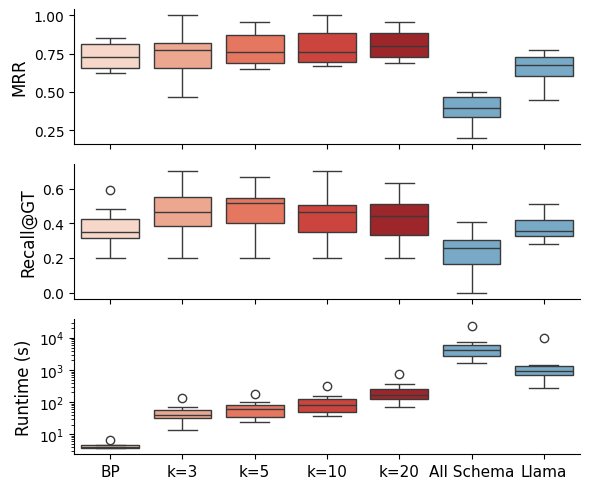

In [12]:
#  Create figure
fig, axes = plt.subplots(3, 1, figsize=(6,5), sharex=True)

# Plot MRR (box plot)
sns.boxplot(x='method', y='mrr', data=df, order=methods_order, ax=axes[0], palette=colors)
axes[0].set_ylabel('MRR', fontsize=12)
axes[0].set_xlabel('')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot Recall@GT (box plot)
sns.boxplot(x='method', y='All_RecallAtSizeofGroundTruth', data=df, order=methods_order, ax=axes[1], palette=colors)
axes[1].set_ylabel('Recall@GT', fontsize=12)
axes[1].set_xlabel('')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Plot Runtime (box plot, log scale)
sns.boxplot(x='method', y='runtime', data=df, order=methods_order, ax=axes[2], palette=colors)
axes[2].set_ylabel('Runtime (s)', fontsize=12)
axes[2].set_yscale('log')  # Set y-axis to log scale
axes[2].set_xlabel('')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Formatting
plt.xticks(rotation=0, ha='center', fontsize=11)  # Set x-axis labels to horizontal
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)

# Remove grid lines
for ax in axes:
    ax.grid(False)

plt.savefig('gpt_ablation_realworld-gdc.pdf', dpi=300)
plt.show()

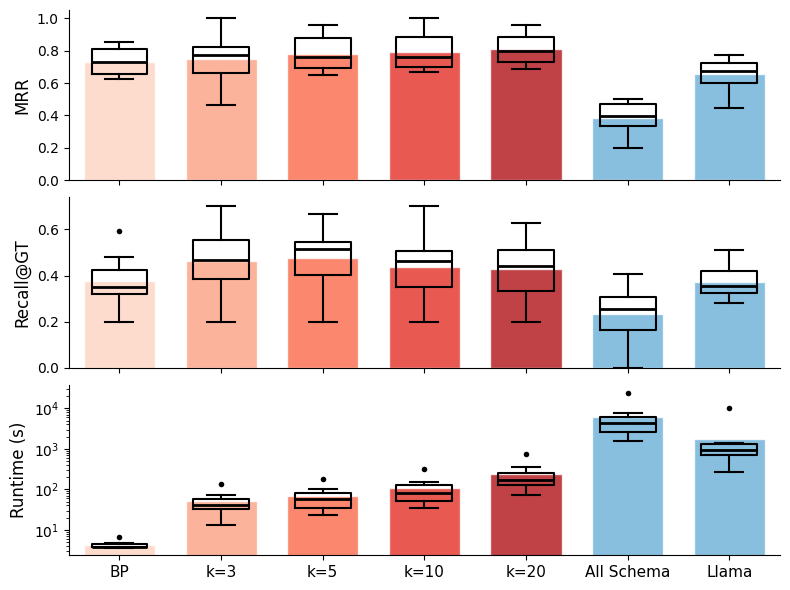

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
x_pos = range(len(methods_order))  # X-axis positions

# Plot configuration
metrics = ['mrr', 'All_RecallAtSizeofGroundTruth', 'runtime']
ylabels = ['MRR', 'Recall@GT', 'Runtime (s)']
bar_width = 0.7
box_width = 0.55

for ax, metric, ylabel in zip(axes, metrics, ylabels):
    # Calculate means for bars
    means = df.groupby('method')[metric].mean().reindex(methods_order)
    
    # Plot bars with colors
    bars = ax.bar(x_pos, means, width=bar_width, color=colors, alpha=0.8, edgecolor='white')
    
    # Prepare data for boxplots
    box_data = [df[df['method'] == method][metric].values for method in methods_order]
    
    # Plot black boxplots
    box = ax.boxplot(box_data, positions=x_pos, widths=box_width, patch_artist=False,
                    boxprops=dict(color='black', linewidth=1.5),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5),
                    medianprops=dict(color='black', linewidth=2),
                    flierprops=dict(marker='o', markersize=4, 
                                    markerfacecolor='black', markeredgecolor='none'))
    
    # Formatting
    ax.set_ylabel(ylabel, fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set log scale for runtime
    if metric == 'runtime':
        ax.set_yscale('log')

# Final formatting
plt.xticks(x_pos, methods_order, rotation=0, fontsize=11)
plt.xlabel('')  # Remove x-axis label
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

plt.show()

In [18]:
df = pd.read_csv('gdc_studies-ablations.csv')

mean_recall = df.groupby('method')['All_RecallAtSizeofGroundTruth'].mean()
print(mean_recall)

mean_mrr = df.groupby('method')['mrr'].mean()
print(mean_mrr)

method
BP          0.375099
GPT4o       0.232147
Llama3.3    0.373126
k=10        0.435499
k=20        0.429998
k=3         0.464723
k=5         0.474593
Name: All_RecallAtSizeofGroundTruth, dtype: float64
method
BP          0.731332
GPT4o       0.386743
Llama3.3    0.656474
k=10        0.793845
k=20        0.807587
k=3         0.750345
k=5         0.780049
Name: mrr, dtype: float64


In [19]:
mean_runtime = df.groupby('method')['runtime'].mean()
print(mean_runtime)

method
BP             4.275659
GPT4o       6089.550069
Llama3.3    1785.730271
k=10         106.667590
k=20         235.130013
k=3           50.993988
k=5           67.866823
Name: runtime, dtype: float64
